<a href="https://colab.research.google.com/github/Dhruvikaa001/FactorAnalysis/blob/main/FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

Factor analysis is widely utilized in market research, advertising, psychology, finance, and operation research.

Assumptions:

There are no outliers in data.

Sample size should be greater than the factor.

There should not be perfect multicollinearity(Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.)

There should not be homoscedasticity(Homogenity of variances) between the variables.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capstone project 2 DBA/Service_test (1).csv")
df.head(1)

,id,Gender,Customer Type,Age,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages,satisfaction
0,19556,Female,Loyal Customer,52,5,4,3,4,3,4,3,5,5,5,5,2,5,5,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    25976 non-null  int64 
 1   Gender                                25976 non-null  object
 2   Customer Type                         25976 non-null  object
 3   Age                                   25976 non-null  int64 
 4   Quality_of_Voice_Call                 25976 non-null  int64 
 5   Cost_of_Internet_Bundles_or_Packages  25976 non-null  int64 
 6   Customer_Relation                     25976 non-null  int64 
 7   CROSS_calls                           25976 non-null  int64 
 8   Cost_of_Internet_Service              25976 non-null  int64 
 9   Internet_Connectivity_Quality         25976 non-null  int64 
 10  Cost_of_Credit                        25976 non-null  int64 
 11  Network_Coverage            

In [ ]:
df.isnull().sum()

id                                      0
Gender                                  0
Customer Type                           0
Age                                     0
Quality_of_Voice_Call                   0
Cost_of_Internet_Bundles_or_Packages    0
Customer_Relation                       0
CROSS_calls                             0
Cost_of_Internet_Service                0
Internet_Connectivity_Quality           0
Cost_of_Credit                          0
Network_Coverage                        0
Sim_Cards_Availability                  0
Popularity_of_Network_Provider          0
Brand_Image                             0
Adverts_Being_Ran                       0
Offering_Sponsorship                    0
Voice_Call_Packages                     0
satisfaction                            0
dtype: int64

In [ ]:
df.shape

(25976, 19)

In [ ]:
df.describe()

,id,Age,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,65005.657992,39.620958,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226
std,37611.526647,15.135685,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330
min,17.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32170.500000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,65319.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97584.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,129877.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

Bartlett’s Test

Kaiser-Meyer-Olkin Test

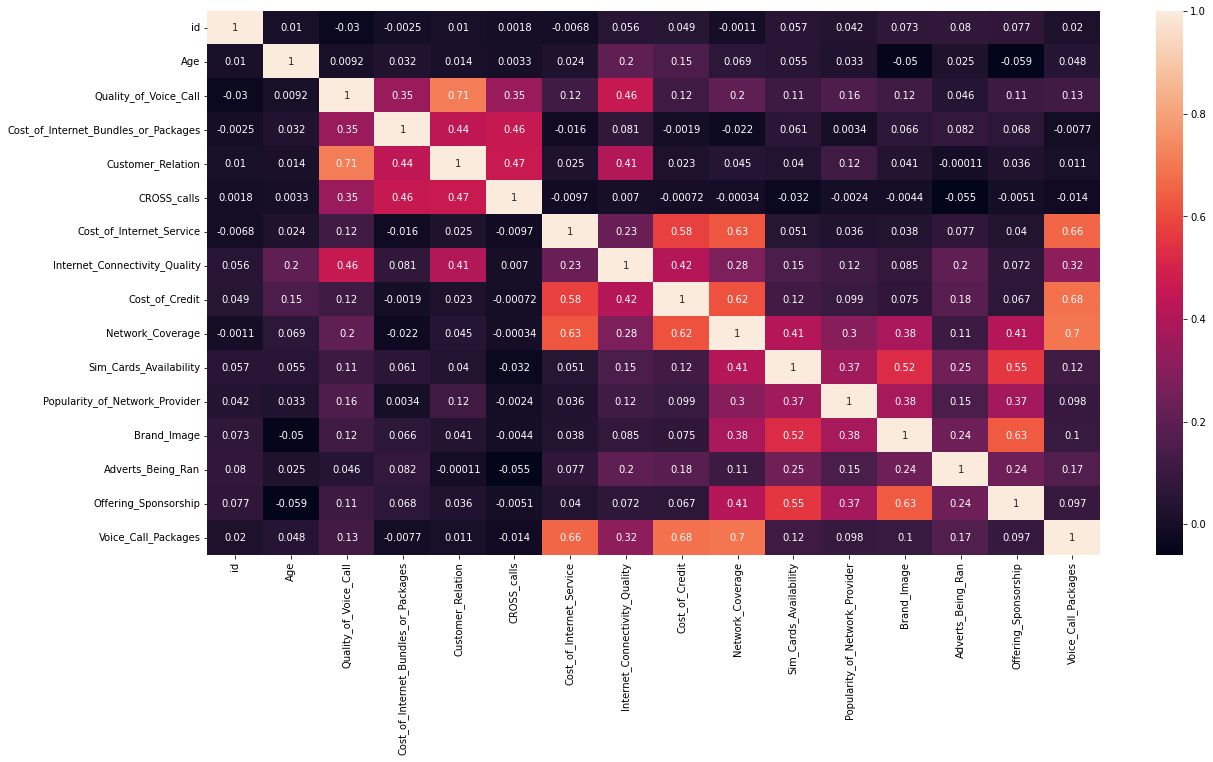

In [ ]:
#Finding Corellation

plt.figure(figsize=(20, 10))
c=df.corr()
sns.heatmap(c,annot=True)

In [ ]:
#Making new data frame by excluding columns(id,gender,customer type ,age,satisfaction)
df1=df[df.columns[4:18]]
df1.head()

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4


BARTLETT’S TEST OF SPHERICITY

Bartlett’s test checks whether the correlation is present in the given data. It tests the null hypothesis (H0) that the correlation matrix is an Identical matrix. The identical matrix consists of all the diagonal elements as 1. So, the null hypothesis assumes that no correlation is present among the variables.


We want to reject this null hypothesis because factor analysis aims at explaining the common variance i.e. the variation due to correlation among the variables. If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with a 95% confidence level.

Ho=The null hypothesis for the test is that the variances are equal for all samples.

Ha=The alternate hypothesis (the one you’re testing), is that the variances are not equal for one pair or more

In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

In [ ]:
#Since the p test statistic is less than 0.05,
# we can conclude that The alternate hypothesis (the one you’re testing), is that the variances are not equal for one pair or more
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(152172.39908232802, 0.0)

KAISER-MEYER-OLKIN (KMO) TEST
KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated. We can also say it as a measure of how suited our data is for factor analysis.

In [ ]:
#Kaiser-Meyer-Olkin (KMO)
#The Kaiser–Meyer–Olkin (KMO) test is a statistical measure to determine how suited data is for factor analysis.
# The test measures sampling adequacy for each variable in the model and the complete model.
#The statistic is a measure of the proportion of variance among variables that might be common variance.
#The higher the proportion, the higher the KMO-value, the more suited the data is to factor analysis
#we can see that our data has an overall proportion of variance of 0.78
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model

0.7824143507684062

# DETERMINING THE NUMBER OF FACTORS

The number of factors in our dataset is equal to the number of variables in our dataset. All the factors are not gonna provide a significant amount of useful information about the common variance among the variables. So we have to decide the number of factors. The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigenvalues.

Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1.

But why should we choose the factors whose eigenvalues are greater than 1? The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.

In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

In [ ]:
df1.head(1)

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5


In [ ]:
df1.columns

Index(['Quality_of_Voice_Call', 'Cost_of_Internet_Bundles_or_Packages',
       'Customer_Relation', 'CROSS_calls', 'Cost_of_Internet_Service',
       'Internet_Connectivity_Quality', 'Cost_of_Credit', 'Network_Coverage',
       'Sim_Cards_Availability', 'Popularity_of_Network_Provider',
       'Brand_Image', 'Adverts_Being_Ran', 'Offering_Sponsorship',
       'Voice_Call_Packages'],
      dtype='object')

In [ ]:
#Subset of the data  columns containing the survey answers
x =df1
fa = FactorAnalyzer()
fa.fit(x, 10)

FactorAnalyzer(rotation_kwargs={})

What is Eigenvalues?

Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

Eigenvalues is a good criteria for determining a factor.  If Eigenvalues is greater than one, we should consider that a factor and if Eigenvalues is less than one, then we should not consider that a factor.

In [ ]:
#Check Eigenvalues
fa = FactorAnalyzer(rotation=None, n_factors=len(df1.columns))
fa.fit(df1)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev


array([3.7862382 , 2.40860525, 2.18161657, 1.06344892, 0.94395049,
       0.6889982 , 0.52872324, 0.50770035, 0.46268646, 0.36501452,
       0.3305411 , 0.28741198, 0.2595226 , 0.18554213])

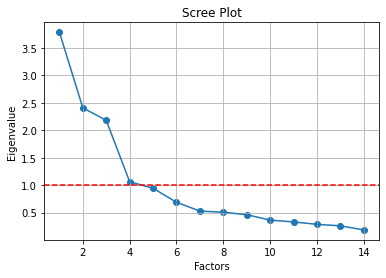

In [ ]:
plt.scatter(range(1,df1.shape[1]+1),ev)
plt.plot(range(1,df1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

We will only use 3 factors here, given the big dropoff in eigenvalue after the 3rd factor. These factors have eigenvalues of 3.7, 2.4 , 2.1 .
The FactorAnalyzer function is where we specify the number of factors we want as well as the type of rotation. Simply put, the idea of rotation is to rotate the factors in order to achieve a simpler and more interpretable structure. Many types of rotations exist. Below, I will use varimax rotation, which maximizes the sum of the variance of squared loadings while ensuring that the factors created are not correlated (orthogonality). Let’s see what factors are created.

In [ ]:
df1.head(1)

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5


# INTERPRETING THE FACTORS

Create an optimal number of factors i.e. 3 in our case. Then, we have to interpret the factors by making use of loadings, variance, and communalities.

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.



**Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.**

In [ ]:
# Factor rotation, including Varimax rotation, transforms the initial factors into new ones that are easier to interpret.
#Varimax rotation is a statistical technique used at one level of factor analysis as an attempt to clarify the relationship among factors.
# Generally, the process involves adjusting the coordinates of data that result from a principal components analysis.
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.16346953  0.12677268  0.76064248]
 [-0.04682986  0.05109289  0.51424604]
 [ 0.02897781  0.02692702  0.92125229]
 [-0.03872083 -0.0388429   0.51878056]
 [ 0.75593131  0.01197258 -0.00292856]
 [ 0.38827807  0.11325499  0.3666619 ]
 [ 0.79592338  0.07687229  0.02412952]
 [ 0.75010383  0.46654477  0.00912983]
 [ 0.08307233  0.70658801  0.02598115]
 [ 0.07298611  0.48987498  0.08255815]
 [ 0.02731511  0.76932914  0.02517718]
 [ 0.13028349  0.28940259  0.02061589]
 [ 0.02358038  0.79858607  0.01505734]
 [ 0.85664625  0.09167543 -0.00824982]]


What are the factor loadings?

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

In [ ]:
#Create Segments and Review Loadings
#By seeing this we will decide on which factor does measured variables are showing more value and it will comes under that factor
fa = FactorAnalyzer(rotation="varimax", n_factors=3)
fa.fit(df1)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
loadings.index = df1.columns
loadings

,Factor-1,Factor-2,Factor-3
Quality_of_Voice_Call,0.163470,0.126773,0.760642
Cost_of_Internet_Bundles_or_Packages,-0.046830,0.051093,0.514246
Customer_Relation,0.028978,0.026927,0.921252
CROSS_calls,-0.038721,-0.038843,0.518781
Cost_of_Internet_Service,0.755931,0.011973,-0.002929
Internet_Connectivity_Quality,0.388278,0.113255,0.366662
Cost_of_Credit,0.795923,0.076872,0.024130
Network_Coverage,0.750104,0.466545,0.009130
Sim_Cards_Availability,0.083072,0.706588,0.025981
Popularity_of_Network_Provider,0.072986,0.489875,0.082558


In [ ]:
df1.head(1)

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5


In [ ]:
#Scores greater than 0.4 are considered stable (Guadagnoli and Velicer, 1988).
#Therefore we are filling values lesser than 0.4 with NA
segments = loadings[loadings >= .4].fillna(loadings[loadings <= -.4])
segments

,Factor-1,Factor-2,Factor-3
Quality_of_Voice_Call,NaN,NaN,0.760642
Cost_of_Internet_Bundles_or_Packages,NaN,NaN,0.514246
Customer_Relation,NaN,NaN,0.921252
CROSS_calls,NaN,NaN,0.518781
Cost_of_Internet_Service,0.755931,NaN,NaN
Internet_Connectivity_Quality,NaN,NaN,NaN
Cost_of_Credit,0.795923,NaN,NaN
Network_Coverage,0.750104,0.466545,NaN
Sim_Cards_Availability,NaN,0.706588,NaN
Popularity_of_Network_Provider,NaN,0.489875,NaN


factor1 = data[['Cost_of_Internet_Service', 'Cost_of_Credit', 'Network_Coverage	',Voice_Call_Packages	]]

factor2 = data[['Sim_Cards_Availability', 'Popularity_of_Network_Provider', Brand_Image','Offering_Sponsorship',]]

factor3 = data[['Quality_of_Voice_Call', 'Cost_of_Internet_Bundles_or_Packages', 'Customer_Relation', 'CROSS_calls	']]

Note:We are not taking Internet_Connectivity_Quality,Adverts_Being_Ran as their loadings values are very less.

Now we can start naming the segments based on the features that are within each factor. To do this, we just name the columns.

In [ ]:
#giving names to the segments
segment_names = ['Cost', 'Goodwill', 'Service']
segments.columns = segment_names
segments

,Cost,Goodwill,Service
Quality_of_Voice_Call,NaN,NaN,0.760642
Cost_of_Internet_Bundles_or_Packages,NaN,NaN,0.514246
Customer_Relation,NaN,NaN,0.921252
CROSS_calls,NaN,NaN,0.518781
Cost_of_Internet_Service,0.755931,NaN,NaN
Internet_Connectivity_Quality,NaN,NaN,NaN
Cost_of_Credit,0.795923,NaN,NaN
Network_Coverage,0.750104,0.466545,NaN
Sim_Cards_Availability,NaN,0.706588,NaN
Popularity_of_Network_Provider,NaN,0.489875,NaN


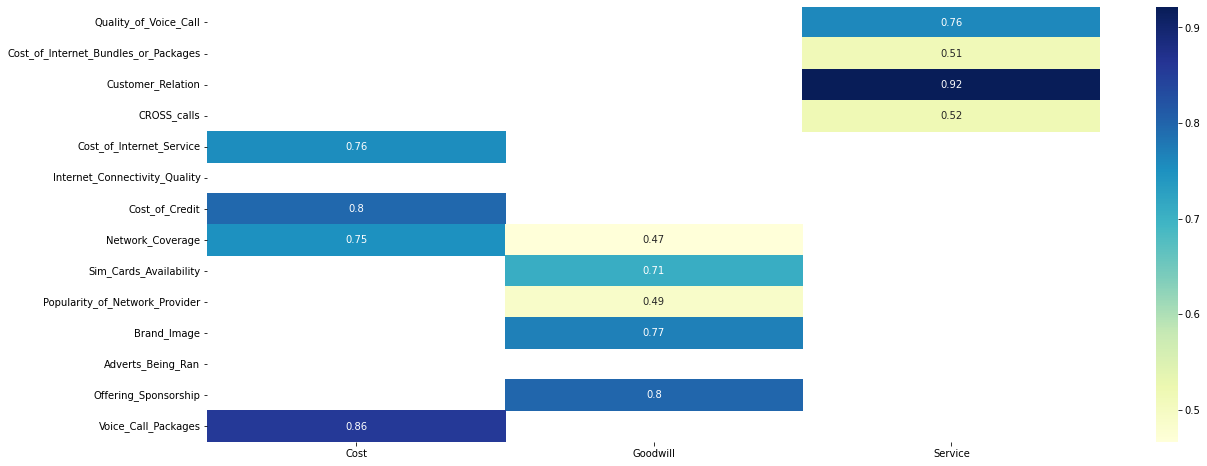

In [ ]:
#Heatmap of loadings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.heatmap(segments, annot=True, cmap="YlGnBu")

In [ ]:
df1.columns

Index(['Quality_of_Voice_Call', 'Cost_of_Internet_Bundles_or_Packages',
       'Customer_Relation', 'CROSS_calls', 'Cost_of_Internet_Service',
       'Internet_Connectivity_Quality', 'Cost_of_Credit', 'Network_Coverage',
       'Sim_Cards_Availability', 'Popularity_of_Network_Provider',
       'Brand_Image', 'Adverts_Being_Ran', 'Offering_Sponsorship',
       'Voice_Call_Packages'],
      dtype='object')

Excluding Internet_Connectivity_Quality,Adverts_Being_Ran

In [ ]:
# Excluding Internet_Connectivity_Quality,Adverts_Being_Ran, as its loadings are lesser than 0.4
df2 = df1. drop(['Internet_Connectivity_Quality','Adverts_Being_Ran'], axis=1)
df2.head()



,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Offering_Sponsorship,Voice_Call_Packages
0,5,4,3,4,3,3,5,5,5,5,5,5
1,1,1,3,1,5,5,4,4,4,4,4,5
2,2,0,2,4,2,2,2,4,1,3,2,2
3,0,0,0,2,3,4,1,1,1,1,1,4
4,2,3,4,3,4,2,2,2,2,2,2,4




**Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.**

In [ ]:
#Subset of the data  columns containing the survey answers
x =df2
fa = FactorAnalyzer()
fa.fit(x)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
#communalities
communalities = fa.get_communalities()
communalities = pd.DataFrame(communalities, index=df2.T.index, columns=['communalities'])
communalities.sort_values(by=['communalities'], ascending=True).head(12)

,communalities
Popularity_of_Network_Provider,0.243251
Cost_of_Internet_Bundles_or_Packages,0.309516
CROSS_calls,0.340583
Sim_Cards_Availability,0.499546
Quality_of_Voice_Call,0.530659
Cost_of_Credit,0.611915
Brand_Image,0.614067
Cost_of_Internet_Service,0.650268
Offering_Sponsorship,0.667649
Network_Coverage,0.694485


# VARIANCE


**The first row represents the variance explained by each factor.**

**Proportional variance is the variance explained by a factor out of the total variance.**

 **Cumulative variance is nothing but the cumulative sum of proportional variances of each factor.**


**In our case, the 3 factors together are able to explain 50.9% of the total variance.**

In unrotated cases, the variances would be equal to the eigenvalues. Rotation changes the distribution of proportional variance but the cumulative variance will remain the same. Oblique rotations allow correlation between the factors while the orthogonal rotations keep the factors uncorrelated.

In [ ]:
# Check variance
factorVariance = pd.DataFrame(fa.get_factor_variance())
factorVariance.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
factorVariance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
factorVariance

,Factor-1,Factor-2,Factor-3
SS Loadings,2.592586,2.182162,1.942929
Proportion Variance,0.216049,0.181847,0.161911
Cumulative Variance,0.216049,0.397896,0.559806


In [ ]:
#here we are selecting columns in factors
factor1=df1.iloc[:,[4,6,7,13]]
factor1.head(1)

,Cost_of_Internet_Service,Cost_of_Credit,Network_Coverage,Voice_Call_Packages
0,3,3,5,5


In [ ]:
factor2=df1.iloc[:,[8,9,10,12]]
factor2.head(1)

,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Offering_Sponsorship
0,5,5,5,5


In [ ]:
factor3=df1.iloc[:,[0,1,2,3]]
factor3.head(1)

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls
0,5,4,3,4


Well, the Cronbach alpha can be used to measure whether or not the variables of a factor form a “coherent” and reliable factor. A value above 0.6 for the alpha is in practice deemed acceptable. Here is the code to get the Cronbach alpha using the pingouin package.

In [ ]:
!pip install pingouin
import pingouin as pg

In [ ]:
#Cronbach's alpha is a measure of internal consistency, that is,
#how closely related a set of items are as a group.
#It is considered to be a measure of scale reliability.
#Get cronbach alpha  value above 0.6 for the alpha is in practice deemed acceptable
#how closely related a set of items are as a group
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8784883719850891, array([0.876, 0.881])) (0.776716576817095, array([0.772, 0.781])) (0.772206773309267, array([0.768, 0.777]))


In [ ]:
pd.DataFrame(fa.transform(df2))

,0,1,2
0,0.768806,1.472760,0.653495
1,1.052228,0.247508,-0.560185
2,-1.061298,-0.910458,-0.609947
3,-0.355572,-2.658199,-2.026329
4,-0.220103,-1.566040,0.408098
...,...,...,...
25971,0.545153,0.406969,-0.079620
25972,0.474526,1.034627,0.947780
25973,-1.182455,0.057433,-0.440430
25974,0.500158,0.622797,0.165767


In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

# Confirmatory Factor Analysis

Confirmatory factor analysis (CFA) is a statistical technique used to verify the factor structure of a set of observed variables. CFA allows the researcher to test the hypothesis that a relationship between observed variables and their underlying latent constructs exists.

In [ ]:
import pandas as pd
from factor_analyzer import ConfirmatoryFactorAnalyzer #The purpose of factor analysis is to reduce many individual items into a fewer number of dimensions
from factor_analyzer import ModelSpecificationParser

In [ ]:
df3=df2
df3

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Offering_Sponsorship,Voice_Call_Packages
0,5,4,3,4,3,3,5,5,5,5,5,5
1,1,1,3,1,5,5,4,4,4,4,4,5
2,2,0,2,4,2,2,2,4,1,3,2,2
3,0,0,0,2,3,4,1,1,1,1,1,4
4,2,3,4,3,4,2,2,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,4,4,3,2,4,5,4
25972,4,4,4,4,4,4,4,4,5,5,5,4
25973,2,5,1,5,2,2,2,4,3,4,4,2
25974,3,3,3,3,4,4,4,3,2,5,5,4


In [ ]:
#Cost = data[['Cost_of_Internet_Service', 'Cost_of_Credit', 'Network_Coverage ',Voice_Call_Packages ]]

#Goodwill= data[['Sim_Cards_Availability', 'Popularity_of_Network_Provider', Brand_Image','Offering_Sponsorship',]]

#Service = data[['Quality_of_Voice_Call', 'Cost_of_Internet_Bundles_or_Packages', 'Customer_Relation', 'CROSS_calls ']]

model_dict={"Cost": ["Cost_of_Internet_Service","Cost_of_Credit","Network_Coverage","Voice_Call_Packages"],
            "Goodwill": ["Sim_Cards_Availability","Popularity_of_Network_Provider","Brand_Image","Offering_Sponsorship"],
            "Service": ["Quality_of_Voice_Call","Cost_of_Internet_Bundles_or_Packages","Customer_Relation","CROSS_calls"]}

In [ ]:
# Generate the model specification from a dictionary. The keys in the dictionary should be the factor names, and the values
# should be the feature names. If this method is used to create the ``ModelSpecification``,then factor names and variable names will
# be added as properties to that object.
model_spec=ModelSpecificationParser.parse_model_specification_from_dict(df3,model_dict)#Here parser is used for merging the values from data in dictionary

In [ ]:
#CFA loadings can be more than 1 because it is a regression co-efficients
#Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response.
cfa= ConfirmatoryFactorAnalyzer(model_spec,disp=False)
cfa.fit(df3.values)
pd.DataFrame(cfa.loadings_,columns=model_spec.factor_names,index=model_spec.variable_names)


,Cost,Goodwill,Service
Cost_of_Internet_Service,1.028828,0.000000,0.000000
Cost_of_Credit,0.763997,0.000000,0.000000
Network_Coverage,1.287315,0.000000,0.000000
Voice_Call_Packages,0.663203,0.000000,0.000000
Sim_Cards_Availability,0.000000,0.795117,0.000000
Popularity_of_Network_Provider,0.000000,0.764451,0.000000
Brand_Image,0.000000,1.406898,0.000000
Offering_Sponsorship,0.000000,0.501066,0.000000
Quality_of_Voice_Call,0.000000,0.000000,0.650435
Cost_of_Internet_Bundles_or_Packages,0.000000,0.000000,0.895950


In [ ]:
#Data is transformed to make it better-organized.
pd.DataFrame(cfa.transform(df3.values),columns=model_spec.factor_names)


,Cost,Goodwill,Service
0,0.728367,1.308968,1.675979
1,-0.496980,0.248860,0.559084
2,-0.661015,-0.923293,-1.561446
3,-2.298586,-1.830437,-2.858926
4,0.522808,-0.996134,-1.742032
...,...,...,...
25971,0.029057,0.434245,0.697985
25972,1.065675,0.395397,1.608651
25973,-0.814778,-0.923293,0.208245
25974,0.185499,0.434245,1.162082


# What is Covariance?
In mathematics and statistics, covariance is a measure of the relationship between two random variables. The metric evaluates how much – to what extent – the variables change together. In other words, it is essentially a measure of the variance between two variables. However, the metric does not assess the dependency between variables

**Covariance vs. Correlation**

 **covariance measures the direction of a relationship between two variables, correlation measures the strength of that relationship. This is usually expressed through a correlation coefficient, which can range from -1 to +1.**

 For example As we can see that goodwill and service has high positive covarinace followed by service and cost ,Goodwill and cost

In [ ]:
#covariance
pd.DataFrame(cfa.factor_varcovs_,columns=model_spec.factor_names,index=model_spec.factor_names)

,Cost,Goodwill,Service
Cost,1.000000,0.080331,0.103933
Goodwill,0.080331,1.000000,0.558960
Service,0.103933,0.558960,1.000000


# Structural Equation modelling

In [ ]:
df.head(1)

,id,Gender,Customer Type,Age,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages,satisfaction
0,19556,Female,Loyal Customer,52,5,4,3,4,3,4,3,5,5,5,5,2,5,5,satisfied


In [ ]:
data=df[df.columns[4:19]]
data.head()

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages,satisfaction
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,satisfied
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,satisfied
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,neutral or dissatisfied
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,satisfied
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,satisfied


In [ ]:
!pip install semopy #Library for Structural equation modelling
import semopy as sem

     |████████████████████████████████| 1.6 MB 5.2 MB/s 
  Created wheel for semopy: filename=semopy-2.3.9-py3-none-any.whl size=1657805 sha256=f42e1fc911f4218ea4967f8bab3204a3e1cf75a1e6f5133600607e760276b004
  Stored in directory: /root/.cache/pip/wheels/6e/7c/8d/e50ec69d2674e8bc29217ea96f904e4aec6b9df9a585cf7e24
Successfully built semopy


In [ ]:
data.head(1)

,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages,satisfaction
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,satisfied


LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['satisfaction'])

# printing label
label

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
data.drop("satisfaction", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
data["satisfaction"] = label

# printing Dataframe
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Quality_of_Voice_Call,Cost_of_Internet_Bundles_or_Packages,Customer_Relation,CROSS_calls,Cost_of_Internet_Service,Internet_Connectivity_Quality,Cost_of_Credit,Network_Coverage,Sim_Cards_Availability,Popularity_of_Network_Provider,Brand_Image,Adverts_Being_Ran,Offering_Sponsorship,Voice_Call_Packages,satisfaction
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,1
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,1
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,1
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4,1
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4,1


Overall_Cost = data[['Cost_of_Internet_Service', 'Cost_of_Credit', 'Network_Coverage ',Voice_Call_Packages ]]

Popularity = data[['Sim_Cards_Availability', 'Popularity_of_Network_Provider', Brand_Image','Offering_Sponsorship',]]

Review_Confirmer = data[['Quality_of_Voice_Call', 'Cost_of_Internet_Bundles_or_Packages', 'Customer_Relation', 'CROSS_calls ']]

In [ ]:
# Cost = data[['Cost_of_Internet_Service', 'Cost_of_Credit', 'Network_Coverage ',Voice_Call_Packages ]]

#Goodwill = data[['Sim_Cards_Availability', 'Popularity_of_Network_Provider', Brand_Image','Offering_Sponsorship',]]

#Service = data[['Quality_of_Voice_Call', 'Cost_of_Internet_Bundles_or_Packages', 'Customer_Relation', 'CROSS_calls ']]


model_spec = """
  # measurement model
    Cost =~ Cost_of_Internet_Service + Cost_of_Credit + Voice_Call_Packages
    Goodwill =~ Sim_Cards_Availability + Popularity_of_Network_Provider + Brand_Image + Offering_Sponsorship
    Service =~ Quality_of_Voice_Call + Cost_of_Internet_Bundles_or_Packages + Customer_Relation + CROSS_calls
  # regression
    satisfaction ~ Cost + Goodwill + Service
"""

In [ ]:
model = sem.Model(model_spec)

In [ ]:
model.fit(data=data)

SolverResult(fun=0.3012619762549944, success=True, n_it=27, x=array([1.04918636, 1.16904398, 0.73820094, 1.0088236 , 1.03865566,
       0.73233652, 1.24456677, 0.63755879, 0.15804118, 0.17247123,
       0.06749631, 1.29760081, 0.18268508, 1.77715594, 0.40342667,
       0.83354052, 0.7143413 , 0.66559134, 0.51997787, 0.55984756,
       0.7942887 , 0.34097128, 1.20949542, 1.06882083, 0.09236191,
       0.81008984, 0.97849917, 0.05623112, 0.12546574]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

# Now that we know that, we can go further by asking how much each of the latent independent variables influences satisfaction. We do this by looking at the Estimate column (the estimates of the coefficients).



In [ ]:

model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Cost_of_Internet_Service,~,Cost,1.000000,-,-,-
1,Cost_of_Credit,~,Cost,1.049186,0.008833,118.78535,0.0
2,Voice_Call_Packages,~,Cost,1.169044,0.009532,122.642303,0.0
3,Sim_Cards_Availability,~,Goodwill,1.000000,-,-,-
4,Popularity_of_Network_Provider,~,Goodwill,0.738201,0.010337,71.416576,0.0
5,Brand_Image,~,Goodwill,1.008824,0.009862,102.298486,0.0
6,Offering_Sponsorship,~,Goodwill,1.038656,0.010047,103.377828,0.0
7,Quality_of_Voice_Call,~,Service,1.000000,-,-,-
8,Cost_of_Internet_Bundles_or_Packages,~,Service,0.732337,0.009571,76.512992,0.0
9,Customer_Relation,~,Service,1.244567,0.011029,112.844673,0.0


RMSEA=Root mean square errors of approximation .it should <.08

CFI=Comparitive Fit Index. It should be > .90.

TLI= Tucker-Lewis Index.It should be > .90.

NFI= Normal Fit index should be > .90

GFI/AGFI= Goodness of Fit Index/Adjusted goodness of Fit index should be > .95 and > .90

Chi Sq= Chi square

AIC=Akaike Information Criterion (we will see it when we run differnt models)

BIC=Bayesian Information Criterion(we will see it when we run differnt models)

# RMSEA is not optimal, we would like to have something lower than 0.08, But here.

There fore we will eliminate Network_Coverage from SEM model as Network_Coverage	 Cost laodings 0.750104 and Goodwill Loadings	0.466545 is there 	in confirmatory of factor analysis as it is showing values in both the loadings . we will re re-run the semopy by eliminating Network Coverage.


In [ ]:
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,49,66,7825.581095,0.0,108682.053738,0.928403,0.927996,0.903015,0.927996,0.903563,0.078166,57.397476,294.180397,0.301262


# Path Modelling
Path analysis is an extension of multiple regression. It goes beyond regression in that it allows for the analysis of more complicated models. In particular, it can examine situations in which there are several final dependent variables and those in which there are “chains” of influence, in that variable

Here it is showing How observed variables are influencing latent varibles via path analysis.

    Goodwill is  getting  strongly influenced by  Sim_Cards_Availability + Popularity_of_Network_Provider + Brand_Image + Offering_Sponsorship

    Service is  getting medicore influence  by Quality_of_Voice_Call + Cost_of_Internet_Bundles_or_Packages + Customer_Relation + CROSS_calls

    Cost is getting low influence by  Cost_of_Internet_Service + Cost_of_Credit + Network_Coverage + Voice_Call_Packages

    

In [ ]:
!pip install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


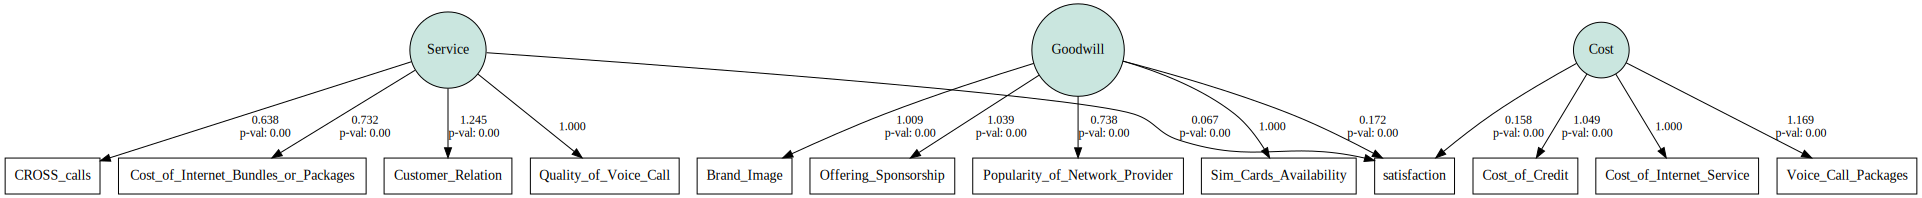

In [ ]:
g = sem.semplot(model, "model.png")
g

# Conclusion

Goodwill has the highest coefficient (0.172), meaning that a change in Goodwill will have the largest impact on Satisfaction.

Cost has the second-highest coefficient (0.158), meaning that Cost has the second-highest impact on Satisfaction.

Service come in last with a coefficient of (0.067). Service still have an impact on Satisfaction, it is just less than Cost and Goodwill.


